# Introduction to neural networks

In this example we are going to create a very simple neural network and use it to predict some values for 1D vector data

We will be utilizing pyTorch to create the neural network

In [3]:
#Load the necessary packages

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt


# Generate some data

Here we will generate some data, and convert that data into a Torch Tensor

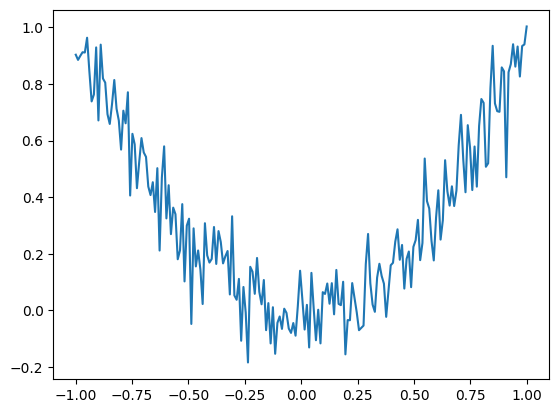

In [5]:
# Generate some synthetic 1D data (for example purposes)
X = np.linspace(-1, 1, 200)
y = X**2 + np.random.normal(0, 0.1, X.shape)  # Quadratic data with noise

# Convert data to PyTorch tensors and reshape
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

plt.figure()
plt.plot(X,y)

## Create a TensorDataset and a train and test loader

In [11]:
# Create a dataset and split it into train and test sets
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Load data in batches
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

## Create the model in PyTorch

In [12]:
# Define the MLP model in PyTorch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, 64)  # Input layer to first hidden layer
        self.hidden2 = nn.Linear(64, 64) # First to second hidden layer
        self.output = nn.Linear(64, 1)   # Second hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Train the model

In [13]:
# Train the model
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    model.train()
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}")



Epoch [10/100], Loss: 0.0127
Epoch [20/100], Loss: 0.0141
Epoch [30/100], Loss: 0.0110
Epoch [40/100], Loss: 0.0127
Epoch [50/100], Loss: 0.0098
Epoch [60/100], Loss: 0.0106
Epoch [70/100], Loss: 0.0103
Epoch [80/100], Loss: 0.0108
Epoch [90/100], Loss: 0.0113
Epoch [100/100], Loss: 0.0103


## Evaluate the model and plot results

Test loss (MSE): 0.0091


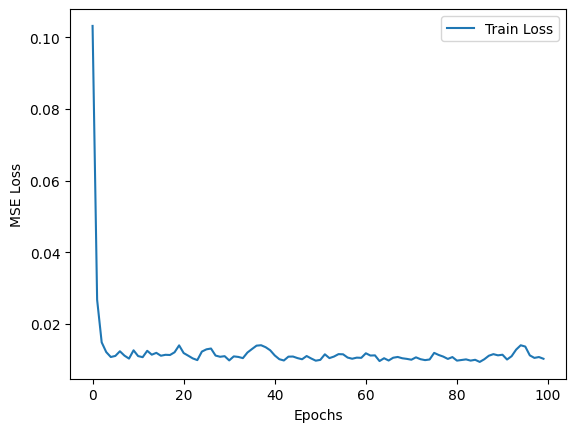

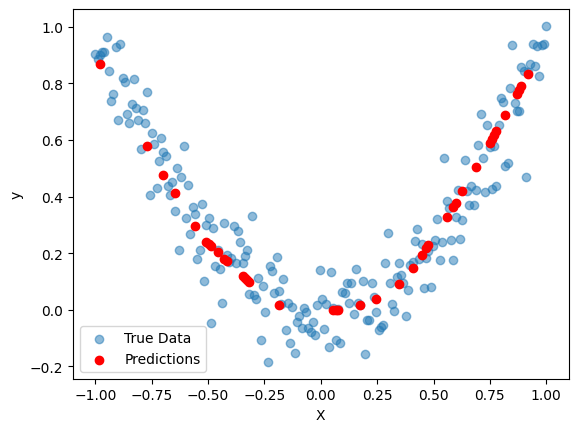

In [14]:
# Evaluate the model on test data
model.eval()
test_loss = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Test loss (MSE): {test_loss:.4f}")

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Make predictions on the test set
X_test = X_tensor[torch.tensor(test_dataset.indices)]
y_test = y_tensor[torch.tensor(test_dataset.indices)]
with torch.no_grad():
    y_pred = model(X_test)

# Plot the results
plt.scatter(X, y, label='True Data', alpha=0.5)
plt.scatter(X_test.numpy(), y_pred.numpy(), color='r', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Exercise

1. Change the size of the neural network, and retrain and check the predictions. What happens when the number of layers and/or neurons is too small? What about when it is too large?

2. Does the neural network do a good job at extrapolation? Check.

3. Can you try to predict 2 y values instead of 1? Imagine y1 takes the form of a quadratic, and y2 takes the form of a Gaussian, for example. Write a neural network that works on these inputs